In [34]:
"""
Importing Libraries
"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import make_multilabel_classification

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [35]:
"""
Importing the models
"""
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [36]:
pwd

'/Users/isidoraconic/Desktop/NewsSummarization'

In [37]:
"""
Reading the column data from the respective .csv files that contains the Text and respective label.
This model works on all kinds of Text data that was labeled properly according to the text. 
We just need to change the name of the file that was given as an input.
"""
df1 = pd.read_csv("BBC News Train.csv")  #BBC News Train #Huff Post
df2 = pd.read_csv("Huff Post.csv")
frames=[df1,df2]
df= pd.concat(frames)
df["Category"] = df["Category"].str.lower()
df = df[['Text','Category']]
df

FileNotFoundError: [Errno 2] No such file or directory: 'BBC News Train.csv'

In [6]:
"""
Displaying the labels w.r.t the Text and passing it as an input to 
1. Generate the list to visualize the category count
2. Generate the dictionaries to map 
    a. the label to integer.
    b. the predicicted outcome to the corresponding label.
"""
df['Category']

0       business
1       business
2       business
3           tech
4       business
          ...   
5440      sports
5441      sports
5442      comedy
5443      sports
5444    politics
Name: Category, Length: 6935, dtype: object

In [7]:
"""
Displaying the categories w.r.t their count
"""
df['category_id'] = df['Category'].factorize()[0]
category_list = df.groupby('Category').category_id.count()
category_list

Category
black voices      290
business          392
comedy            305
crime             136
education          26
entertainment    1394
impact             55
latino voices      13
media             174
politics         2299
queer voices      290
religion           39
science            28
sport             346
sports            178
tech              301
travel             55
weird news        133
women             140
world news        341
Name: category_id, dtype: int64

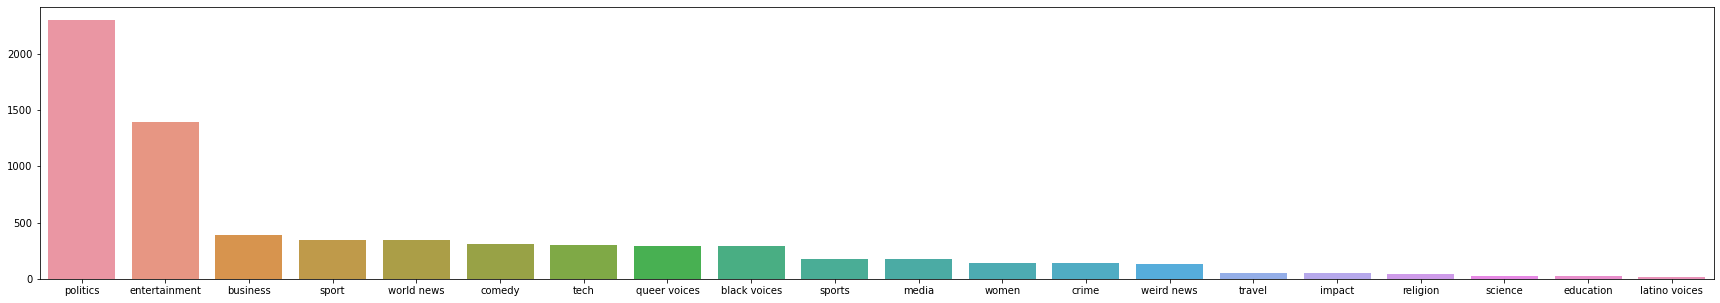

In [8]:
"""
Visualizing the label count
"""
category = df['Category'].value_counts()
plt.figure(figsize=(30, 5))
sns.barplot(category.index, category.values);

In [9]:
"""
Using term frequency and inverse document frequency to generate the features w.r.t the stopwords present in the text.
"""
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2),
                        stop_words='english')

In [10]:
"""
Generating the features
"""
features = tfidf.fit_transform(df.Text).toarray()
features

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.02886685, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.038848  , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [11]:
"""
Generating the labels for the respective text
"""
labels = df.category_id
labels

0        0
1        0
2        0
3        1
4        0
        ..
5440    13
5441    13
5442    11
5443    13
5444     2
Name: category_id, Length: 6935, dtype: int64

In [12]:
"""
Generating a list of available categories to pass this an input to generate dictionary
"""
list = df['Category'].values
list

array(['business', 'business', 'business', ..., 'comedy', 'sports',
       'politics'], dtype=object)

In [13]:
"""
Populating the 2 dictionaries
    a. the label to integer.
    b. the predicicted outcome to the corresponding label.
"""
category_to_id_dict = {}
id_to_category_dict = {}

i=0
for word in list:
      if not word in category_to_id_dict:
            category_to_id_dict.update({word:i})
            id_to_category_dict.update({i:word})
            i=i+1
category_to_id_dict

{'business': 0,
 'tech': 1,
 'politics': 2,
 'sport': 3,
 'entertainment': 4,
 'crime': 5,
 'world news': 6,
 'impact': 7,
 'weird news': 8,
 'black voices': 9,
 'women': 10,
 'comedy': 11,
 'queer voices': 12,
 'sports': 13,
 'travel': 14,
 'media': 15,
 'religion': 16,
 'science': 17,
 'latino voices': 18,
 'education': 19}

In [14]:
id_to_category_dict

{0: 'business',
 1: 'tech',
 2: 'politics',
 3: 'sport',
 4: 'entertainment',
 5: 'crime',
 6: 'world news',
 7: 'impact',
 8: 'weird news',
 9: 'black voices',
 10: 'women',
 11: 'comedy',
 12: 'queer voices',
 13: 'sports',
 14: 'travel',
 15: 'media',
 16: 'religion',
 17: 'science',
 18: 'latino voices',
 19: 'education'}

In [15]:
"""
Forming a list of model to pass as an input and check performance of each model w.r.t another
"""
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    KNeighborsClassifier(n_neighbors=3),
    MultinomialNB(),
    LogisticRegression(random_state=0)
]

In [16]:
"""
Calculating the cross-validation score for each model
"""
entries = []

for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=4)
    for i, accuracy in enumerate(accuracies):
        entries.append((model_name, i, accuracy))

/Users/isidoraconic/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/isidoraconic/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

In [17]:
"""
Populating the entries into a Data Frame
"""
entries
cv_df = pd.DataFrame(entries, columns=['model_name', 'Cross-Validation-Set', 'accuracy'])
cv_df

,model_name,Cross-Validation-Set,accuracy
0,RandomForestClassifier,0,0.353518
1,RandomForestClassifier,1,0.339100
2,RandomForestClassifier,2,0.338524
3,RandomForestClassifier,3,0.338142
4,KNeighborsClassifier,0,0.629181
5,KNeighborsClassifier,1,0.744521
6,KNeighborsClassifier,2,0.753749
7,KNeighborsClassifier,3,0.708598
8,MultinomialNB,0,0.540369
9,MultinomialNB,1,0.531142


<AxesSubplot:xlabel='model_name', ylabel='accuracy'>

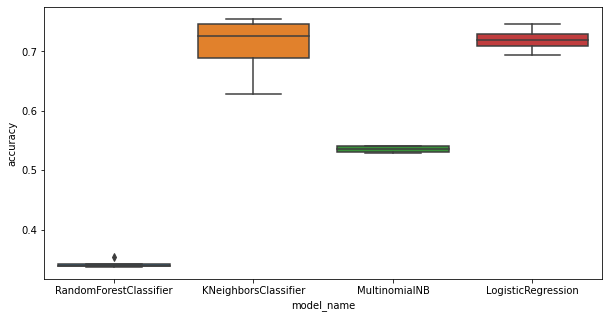

In [18]:
"""
Plotting the results of model (vs) cross_validation_accuracy
"""
plt.figure(figsize=(10, 5))
sns.boxplot('model_name', 'accuracy', data=cv_df)

In [19]:
"""
Modeling the RandomForestClassifier
"""
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [20]:
"""
Spliting the input data into training and testing data
"""
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.10, random_state=42)

In [21]:
"""
Modeling
"""
model = LogisticRegression()

In [22]:
"""
Fitting the model
"""
model.fit(X_train, y_train)

/Users/isidoraconic/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [23]:
"""
predicting the testing data
"""
y_pred = model.predict(X_test)
y_pred

array([ 2,  2,  0,  2,  2,  2,  2,  9,  2,  4,  2,  0,  0,  3,  4,  7,  2,
        4,  2, 12, 13,  4,  2,  2,  4,  2, 13,  5, 12,  2,  4,  4,  4,  4,
        1, 11,  2,  0,  2,  2,  2, 11,  3,  4,  4,  4,  4,  2,  4,  4,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  1,  4,  4,  4,  4,  2,  2, 11,
        2,  4,  2, 13,  2,  2,  2,  6,  2,  2,  4, 12,  2,  4,  2,  4,  2,
        2,  2,  2,  2,  2,  2,  2,  4,  2,  2,  2, 11,  2,  2,  2,  1,  4,
        2,  5,  2,  2,  2,  2,  6,  2,  4,  2,  2, 11,  6,  2, 12,  4,  0,
        4,  4,  0,  4,  4,  2,  2,  4,  4,  3,  3,  2,  4,  2,  4,  4,  2,
        0,  4,  2,  6,  9,  2,  2,  2,  4,  4,  0,  4,  2,  4,  1,  2,  1,
        2,  2,  2,  4,  2,  4, 12,  2,  3,  0,  3,  4,  2,  4,  3,  3,  3,
        2,  2,  7,  3,  2,  4, 12,  2,  2,  2,  2,  0, 11,  2,  2,  2,  4,
        2, 11, 13,  9,  2,  1, 10,  3,  2,  2,  2,  2,  2,  3,  2,  2,  0,
        4,  4, 13,  5,  6,  2,  2,  2,  2,  2,  3,  2,  4,  2,  4,  4,  2,
        2,  5,  4,  3,  2

In [24]:
"""
Evaluating the performance metrics of the model
"""
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7536023054755043

In [25]:
cm_array = confusion_matrix(y_test, y_pred)
cm_array

array([[ 37,   0,   6,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0],
       [  1,  18,   1,   0,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 231,   0,   2,   0,   1,   0,   0,   0,   0,   1,   0,
          0,   0,   0,   0,   0,   0,   0],
       [  1,   0,   0,  48,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   5,   0, 118,   0,   0,   0,   0,   1,   0,   5,   0,
          2,   0,   0,   0,   0,   0,   0],
       [  0,   0,   6,   0,   2,   6,   0,   0,   0,   3,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   9,   0,   3,   0,  11,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   3,   0,   1,   0,   1,   4,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   7,   0,   6,   0,   0,   0,   0,   0,   0,  

<AxesSubplot:>

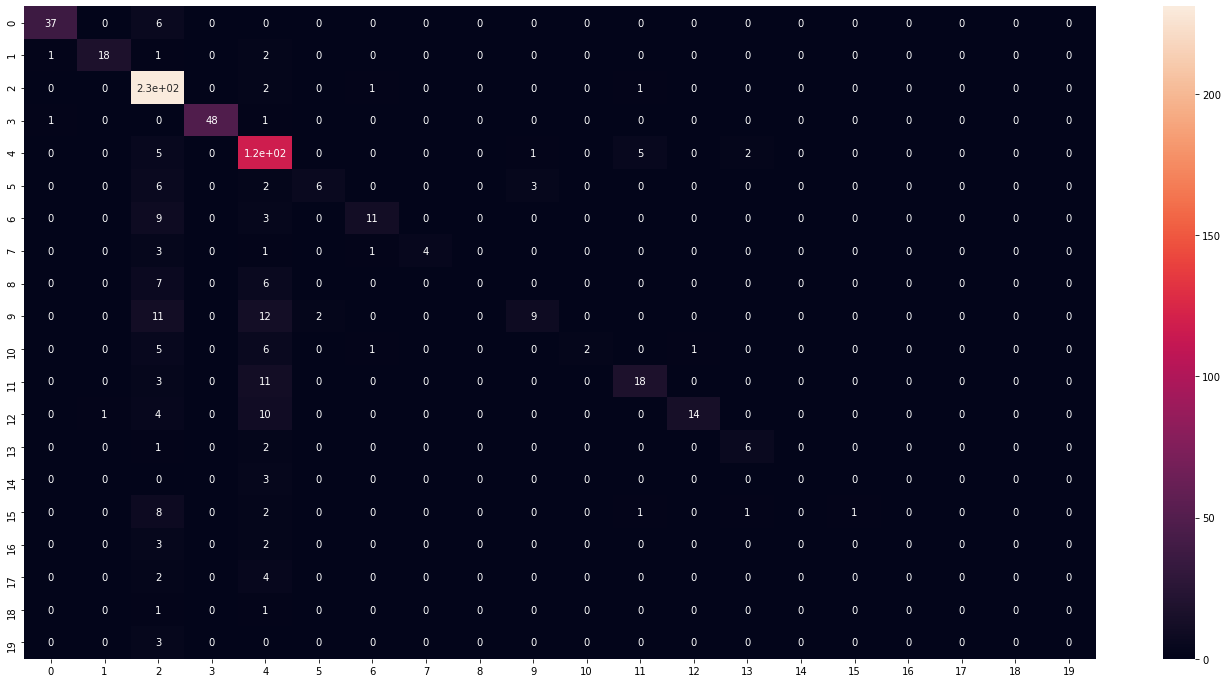

In [33]:
df_cm = pd.DataFrame(cm_array, index = range(len(category_to_id_dict)),
                  columns = range(len(category_to_id_dict)))
plt.figure(figsize = (24,12))
sns.heatmap(df_cm, annot=True)

In [27]:
precision_metric = precision_score(y_test, y_pred, average = "macro")
precision_metric

/Users/isidoraconic/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.5909670368897311

In [28]:
recall_metric = recall_score(y_test, y_pred, average = "macro")
recall_metric

0.39924615435448463

In [29]:
f1_metric = f1_score(y_test, y_pred, average = "macro")
f1_metric

0.4367437352003596

In [30]:
"""
Selecting a block of text to predict it's category
"""
text = df.at[800,"Text"]
text

800    double win for sea inside spanish movie the se...
800    A Pennsylvania nurse has been arrested and cha...
Name: Text, dtype: object

In [31]:
"""
Generating the features
"""
test_features = tfidf.transform([text])

AttributeError: 'Series' object has no attribute 'lower'

In [ ]:
"""
Predicting the label
"""
prediction = model.predict(test_features)

In [ ]:
"""
Printing the label
"""
for i in range(len(prediction)):
    print(id_to_category_dict[prediction[i]])

In [ ]:
import joblib

In [ ]:
joblib.dump(model,'Classification_joblib')